In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
color = sns.color_palette()
import matplotlib.pyplot as plt
from pandas import DataFrame
import statistics
from statistics import mean
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [3]:
type_dic = {'Cover type 0':0, 'Cover type 1':0, 'Cover type 2':0, 'Cover type 3':0, 'Cover type 4':0, 
            'Cover type 5':0, 'Cover type 6':0,'Cover type 7':0, 'Cover type more than 8':0}
for i in list(df_train['Cover_Type']):
    if i == 0:
        type_dic['Cover type 0'] += 1
    if i == 1:
        type_dic['Cover type 1'] += 1
    if i == 2:
        type_dic['Cover type 2'] += 1
    if i == 3:
        type_dic['Cover type 3'] += 1
    if i == 4:
        type_dic['Cover type 4'] += 1
    if i == 5:
        type_dic['Cover type 5'] += 1
    if i == 6:
        type_dic['Cover type 6'] += 1
    if i == 7:
        type_dic['Cover type 7'] += 1
    if i >= 8:
        type_dic['Cover type more than 8'] += 1


In [24]:
type_dic

{'Cover type 0': 0,
 'Cover type 1': 2160,
 'Cover type 2': 2160,
 'Cover type 3': 2160,
 'Cover type 4': 2160,
 'Cover type 5': 2160,
 'Cover type 6': 2160,
 'Cover type 7': 2160,
 'Cover type more than 8': 0}

In [4]:
np.unique(np.array(df_train.Cover_Type))

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

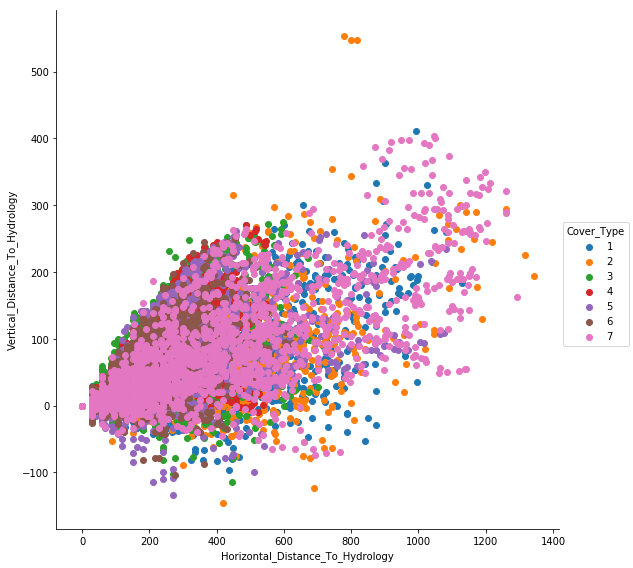

In [5]:
figure1 = sns.FacetGrid(df_train, hue="Cover_Type", size= 8).map(
    plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()
figure1.fig.savefig("figure1.png")

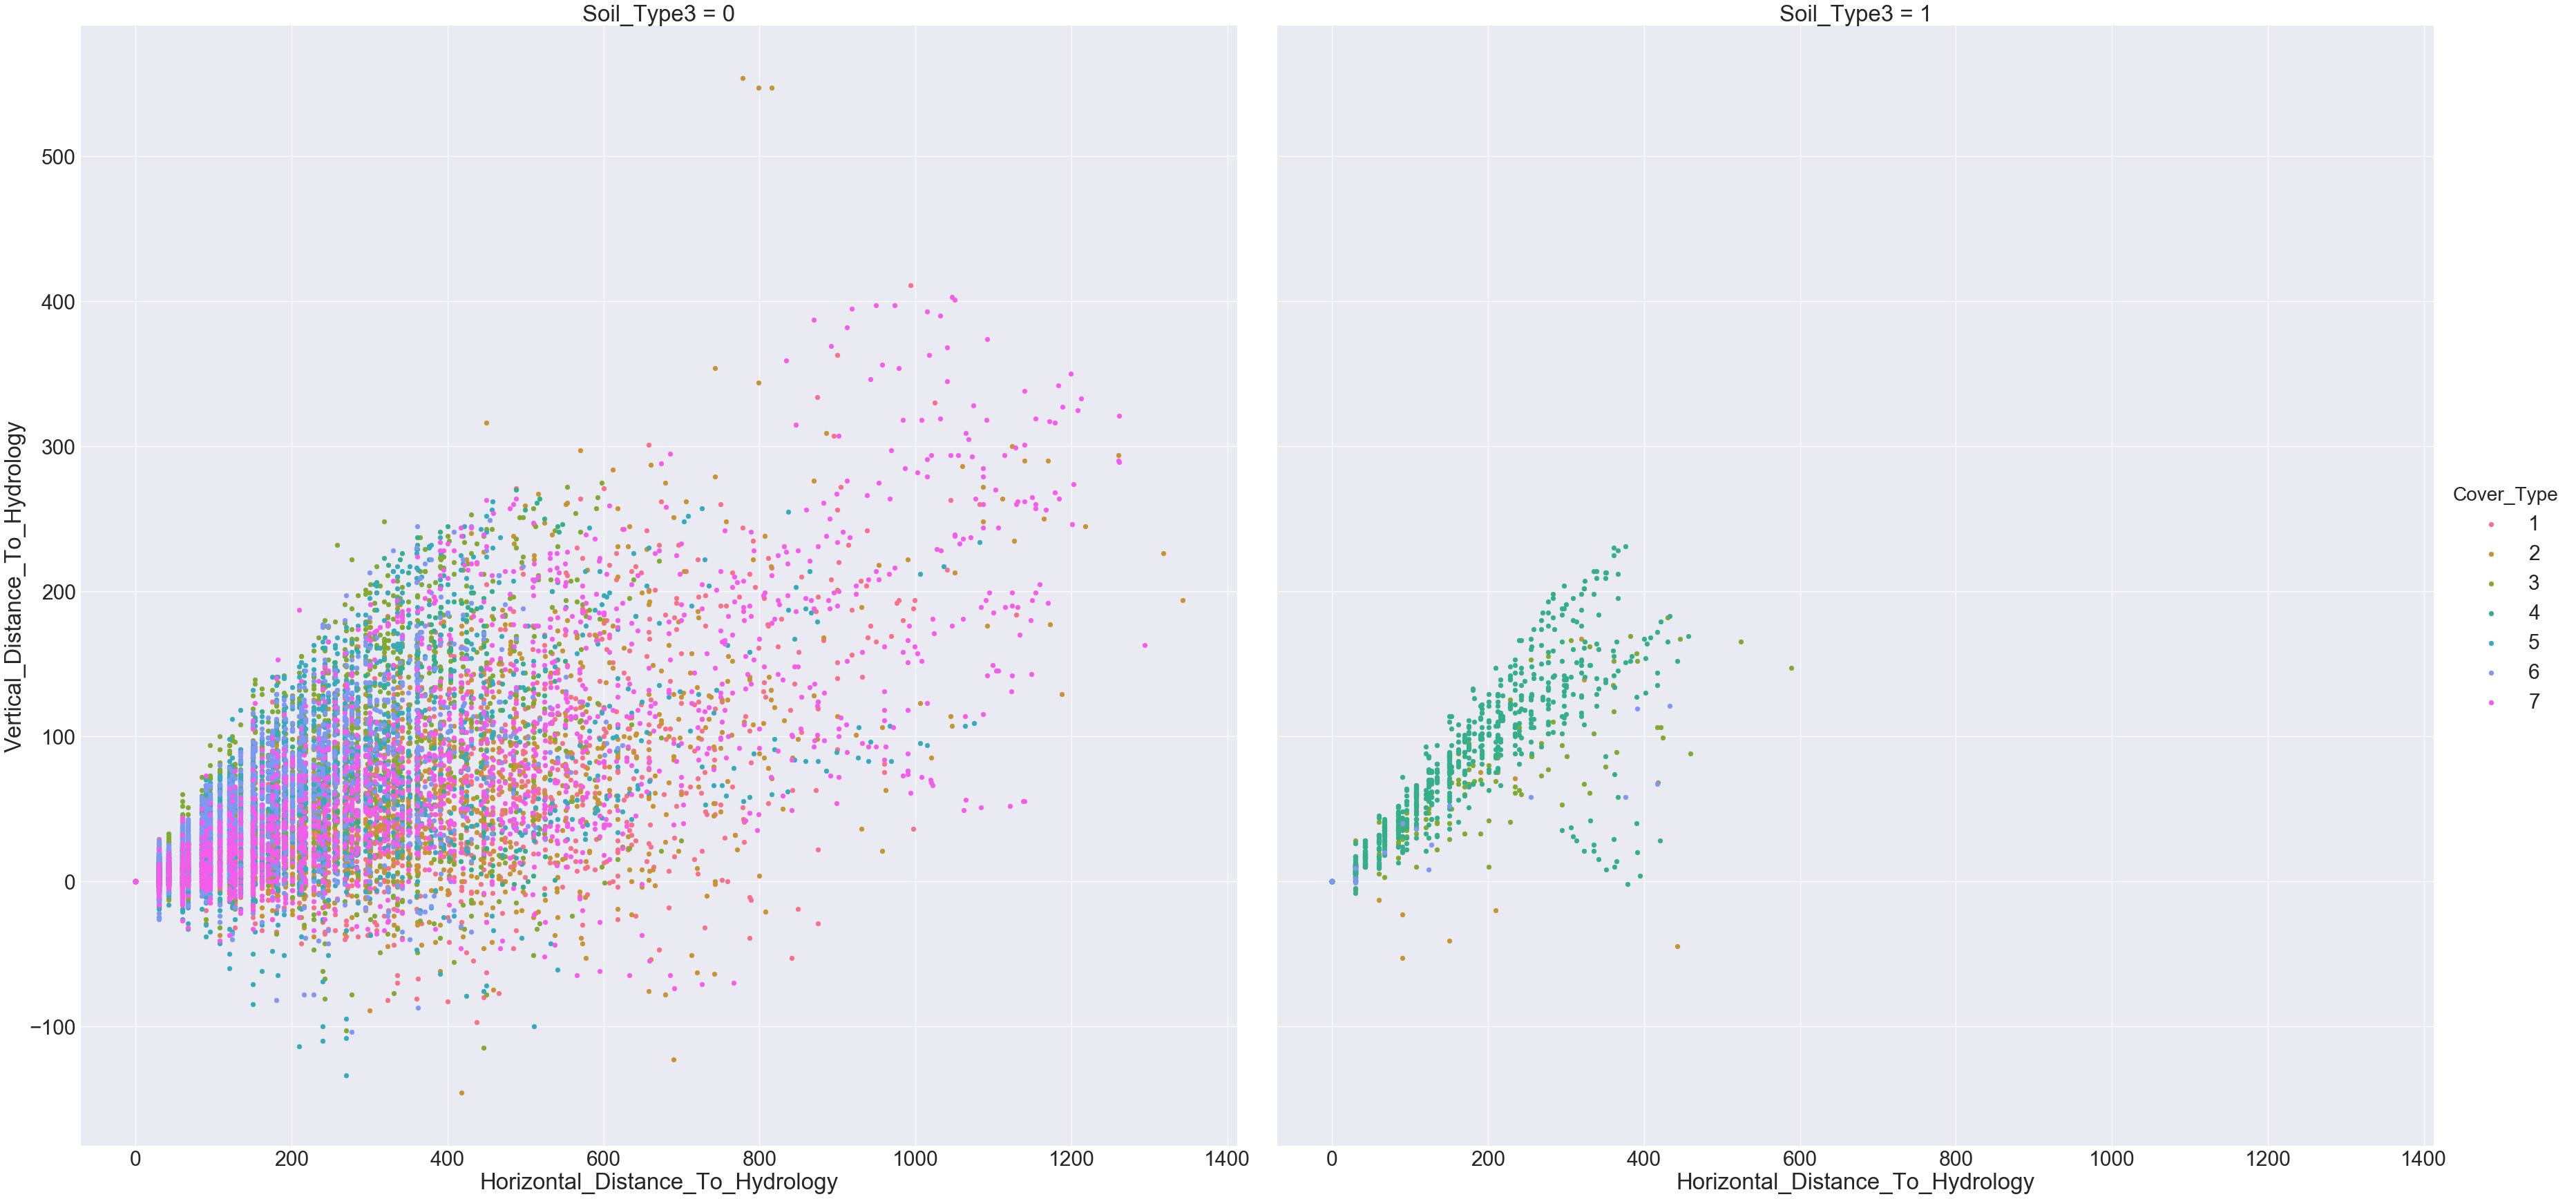

In [6]:
sns.set(font_scale=3)
figure2 = sns.FacetGrid(df_train, col = 'Soil_Type3', hue="Cover_Type", size= 25).map(
    plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()
figure2.fig.savefig("figure2.png")

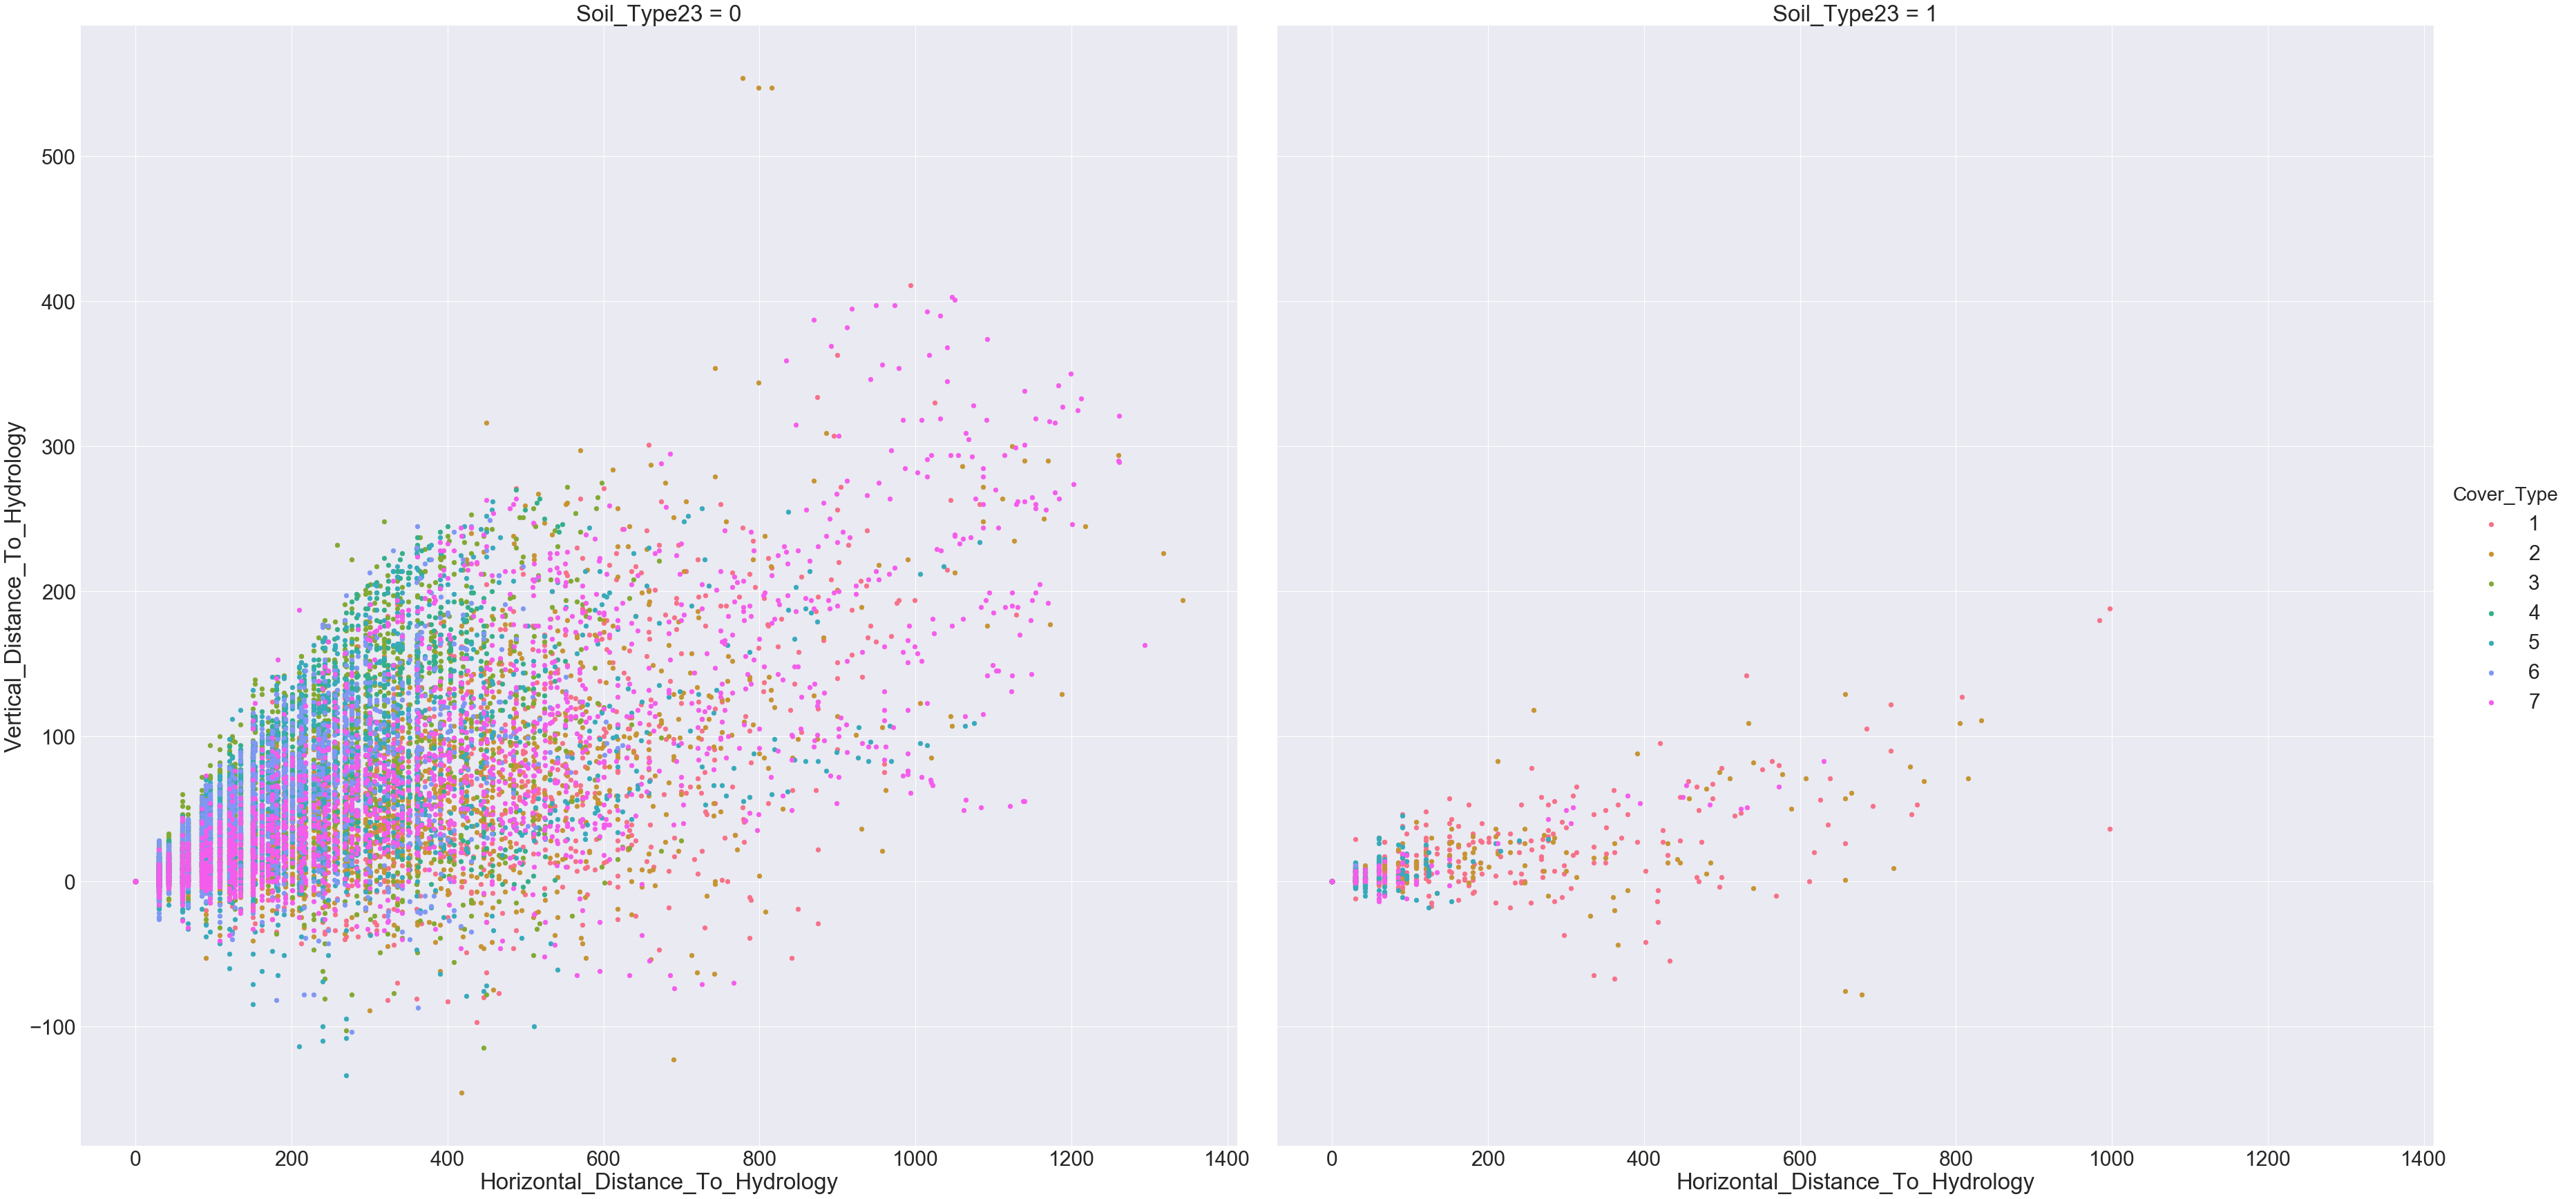

In [7]:
sns.set(font_scale=3)
figure3 = sns.FacetGrid(df_train, col = 'Soil_Type23', hue="Cover_Type", size= 25).map(
    plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()
figure3.fig.savefig("figure3.png")

Generally speaking, the larger horizontal and vertical distances to hydrology likely lead to two extreme conditions: Mostly, the types of trees become the maximum number of count, which is 7 types; the other conditions are that the number of types becomes extremely small that only one or two types are in the measuring regions.
Different soil types also have distinct influences when examining the relationship between distances to hydrology and tree kinds number. For example, if a region has soil type 3, it always has three or four kinds of tree types covering the region. But a region with soil type 23 has completely different case comparing with general situations: only one or two types of trees appear in the region far from hydrology; a region near hydrology usually has most types of trees.


In [8]:
Wilderness_Area_types = []
for i in range(len(df_train)):
    temp_type = 0
    for j in range(1,5):
        temp_str = 'Wilderness_Area%s' %j
        have = df_train.iloc[i][temp_str]
        if have == 1:
            Wilderness_Area_types.append(temp_str)

In [118]:
df_train['Wilderness_Area_types'] = Wilderness_Area_types 

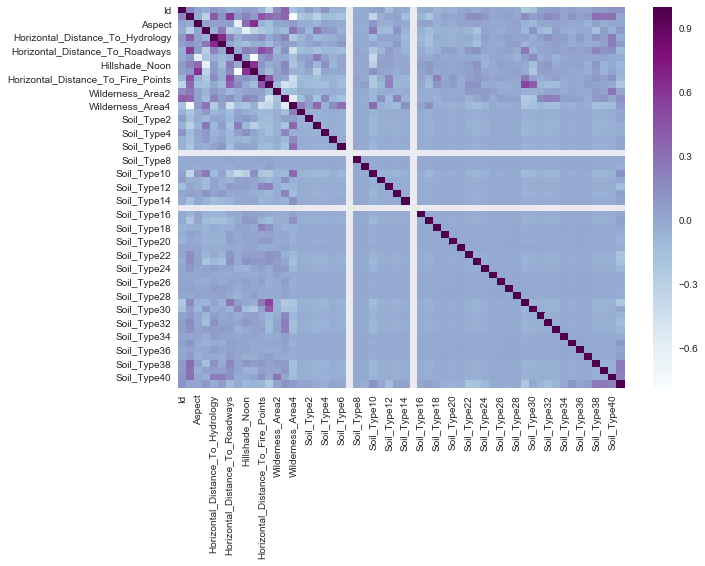

In [12]:
plt.figure(figsize=(10,7))
sns.set(font_scale= 1)
figure4 = sns.heatmap(df_train.corr(),fmt=".1f",cmap="BuPu")
figure4.get_figure().savefig("figure4.png")

In [141]:
list(df_train)

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type',
 'Soil_types',
 'Wildernes